<a href="https://colab.research.google.com/github/sourovdeybd71/World-Of-Machine-Learning/blob/main/ExOfAPI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dict_ = {"a":[11,21,31],"b":[12,22,33]}

In [3]:
df = pd.DataFrame(dict_)
type(df)

pandas.core.frame.DataFrame

In [4]:
df.head()

,a,b
0,11,12
1,21,22
2,31,33


In [5]:
!pip install nba_api

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 280.2/280.2 kB 4.1 MB/s eta 0:00:00


In [6]:
from nba_api.stats.static import teams
import matplotlib.pyplot as plt

In [7]:
def one_dict(list_dict):
    keys=list_dict[0].keys()
    out_dict={key:[] for key in keys}
    for dict_ in list_dict:
        for key, value in dict_.items():
            out_dict[key].append(value)
    return out_dict

In [8]:
nba_teams = teams.get_teams()

In [9]:
nba_teams[1]

{'id': 1610612738,
 'full_name': 'Boston Celtics',
 'abbreviation': 'BOS',
 'nickname': 'Celtics',
 'city': 'Boston',
 'state': 'Massachusetts',
 'year_founded': 1946}

In [10]:
dict_nba_team=one_dict(nba_teams)
df_teams=pd.DataFrame(dict_nba_team)
df_teams.head()

,id,full_name,abbreviation,nickname,city,state,year_founded
0,1610612737,Atlanta Hawks,ATL,Hawks,Atlanta,Georgia,1949
1,1610612738,Boston Celtics,BOS,Celtics,Boston,Massachusetts,1946
2,1610612739,Cleveland Cavaliers,CLE,Cavaliers,Cleveland,Ohio,1970
3,1610612740,New Orleans Pelicans,NOP,Pelicans,New Orleans,Louisiana,2002
4,1610612741,Chicago Bulls,CHI,Bulls,Chicago,Illinois,1966


In [11]:
df_warriors=df_teams[df_teams['nickname']=='Warriors']
df_warriors

,id,full_name,abbreviation,nickname,city,state,year_founded
7,1610612744,Golden State Warriors,GSW,Warriors,Golden State,California,1946


In [12]:
id_warriors=df_warriors[['id']].values[0][0]
# we now have an integer that can be used to request the Warriors information
id_warriors

1610612744

In [13]:
from nba_api.stats.endpoints import leaguegamefinder

In [14]:
gamefinder = leaguegamefinder.LeagueGameFinder(team_id_nullable=id_warriors)

In [15]:
gamefinder.get_json()

'{"resource": "leaguegamefinderparameters", "parameters": {"PlayerOrTeam": "T", "LeagueID": null, "Season": null, "SeasonType": null, "TeamID": "1610612744", "VsTeamID": null, "PlayerID": null, "GameID": null, "Outcome": null, "Location": null, "DateFrom": null, "DateTo": null, "VsConference": null, "VsDivision": null, "Conference": null, "Division": null, "DraftYear": null, "DraftNumber": null, "DraftRound": null, "DraftTeamID": null, "RookieYear": null, "YearsExperience": null, "SeasonSegment": null, "PORound": null, "StarterBench": null, "GtPTS": null, "GtREB": null, "GtAST": null, "GtSTL": null, "GtBLK": null, "GtOREB": null, "GtDREB": null, "GtDD": null, "GtTD": null, "GtMINUTES": null, "GtTOV": null, "GtPF": null, "GtFGM": null, "GtFGA": null, "GtFG_PCT": null, "GtFTM": null, "GtFTA": null, "GtFT_PCT": null, "GtFG3M": null, "GtFG3A": null, "GtFG3_PCT": null, "LtPTS": null, "LtREB": null, "LtAST": null, "LtSTL": null, "LtBLK": null, "LtOREB": null, "LtDREB": null, "LtDD": null, "L

In [16]:
games = gamefinder.get_data_frames()[0]
games.head()

,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,PTS,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS
0,22024,1610612744,GSW,Golden State Warriors,0022400782,2025-02-12,GSW @ DAL,L,239,107,...,0.833,18.0,32.0,50.0,29,9,6,15,16,-4.0
1,22024,1610612744,GSW,Golden State Warriors,0022400760,2025-02-10,GSW @ MIL,W,238,125,...,0.789,15.0,33.0,48.0,27,16,2,9,23,14.0
2,22024,1610612744,GSW,Golden State Warriors,0022400745,2025-02-08,GSW @ CHI,W,241,132,...,0.852,16.0,28.0,44.0,34,8,7,14,23,21.0
3,22024,1610612744,GSW,Golden State Warriors,0022400731,2025-02-06,GSW @ LAL,L,239,112,...,0.700,10.0,30.0,40.0,29,8,2,12,25,-8.0
4,22024,1610612744,GSW,Golden State Warriors,0022400725,2025-02-05,GSW @ UTA,L,241,128,...,0.704,12.0,29.0,41.0,33,6,4,9,24,-3.0


In [19]:
import requests

filename = "https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/PY0101EN/Chapter%205/Labs/Golden_State.pkl"

def download(url, filename):
    response = requests.get(url)
    if response.status_code == 200:
        with open(filename, "wb") as f:
            f.write(response.content)

download(filename, "Golden_State.pkl")


In [20]:
file_name = "Golden_State.pkl"
games = pd.read_pickle(file_name)
games.head()

,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,PTS,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS
0,22019,1610612744,GSW,Golden State Warriors,1521900066,2019-07-12,GSW vs. LAL,L,200,87,...,0.800,13.0,29.0,42.0,13,10.0,3,11.0,21,3.2
1,22019,1610612744,GSW,Golden State Warriors,1521900058,2019-07-10,GSW @ DEN,W,201,73,...,0.867,7.0,27.0,34.0,10,11.0,7,20.0,20,-8.0
2,22019,1610612744,GSW,Golden State Warriors,1521900039,2019-07-08,GSW @ LAL,W,200,88,...,0.621,8.0,29.0,37.0,21,10.0,4,13.0,22,8.0
3,22019,1610612744,GSW,Golden State Warriors,1521900020,2019-07-07,GSW vs. TOR,W,201,80,...,0.923,6.0,37.0,43.0,18,8.0,3,20.0,25,10.0
4,22019,1610612744,GSW,Golden State Warriors,1521900007,2019-07-05,GSW vs. CHA,L,200,85,...,0.889,8.0,28.0,36.0,19,9.0,3,13.0,15,-8.0


In [21]:
games_home=games[games['MATCHUP']=='GSW vs. TOR']
games_away=games[games['MATCHUP']=='GSW @ TOR']

In [22]:
games_home['PLUS_MINUS'].mean()

3.730769230769231

In [23]:
games_away['PLUS_MINUS'].mean()

-0.6071428571428571

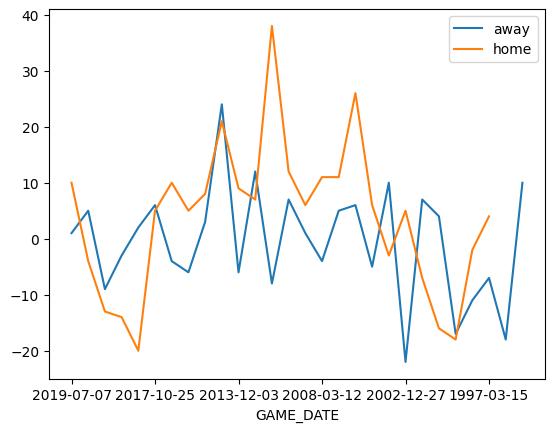

In [24]:
fig, ax = plt.subplots()

games_away.plot(x='GAME_DATE',y='PLUS_MINUS', ax=ax)
games_home.plot(x='GAME_DATE',y='PLUS_MINUS', ax=ax)
ax.legend(["away", "home"])
plt.show()

In [26]:
games_home['PTS'].mean()


106.8076923076923

In [27]:
games_away['PTS'].mean()

102.96428571428571